<a href="https://colab.research.google.com/github/matheusgpantoja/LPO/blob/main/04_03_Particle_Swarm_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Swarm Optimization (PSO)


## 1. Origin and Inspiration

PSO was proposed by **James Kennedy** and **Russell Eberhart** in 1995 after observing the collective behavior
of bird flocks and fish schools, a phenomenon popularized as *swarm intelligence*.  
The core idea is that each individual (particle) adjusts its movement by balancing **exploration** (global search) and **local exploitation** (social learning).


## 2. General Structure of PSO

- **Particle**: position vector $\mathbf{x}_i$ that encodes a candidate solution.  

- **Velocity**: vector $\mathbf{v}_i$ that defines direction and step size of movement.  

- **Personal history** `pbest` ($\mathbf{x}^*_i$): best position ever visited by the particle.  

- **Global history** `gbest` ($\mathbf{g}^*$): best position ever found by the swarm.  


Each iteration moves the particles in the search space toward a combination of `pbest` and `gbest`,  
with random components that prevent stagnation.


## 3. Fundamental Equations

The velocity of each particle $i$ at $t\!+\!1$ is given by:

$$
\mathbf{v}_{i}^{t+1} = \mathbf{v}_i^{t} + \alpha\,\varepsilon_1\,(\mathbf{g}^* - \mathbf{x}_i^{t}) +
\beta\,\varepsilon_2\,(\mathbf{x}^*_i - \mathbf{x}_i^{t}) \tag{1}
$$

* $\alpha, \beta$: acceleration coefficients (or *learning factors*).  
* $\varepsilon_1, \varepsilon_2 \sim U(0,1)$: uniform noise vectors.

Next, the position is updated by:

$$
\mathbf{x}_i^{t+1} = \mathbf{x}_i^{t} + \mathbf{v}_i^{t+1} \tag{2}
$$

### Variant with inertia factor

$$
\mathbf{v}_{i}^{t+1} = \theta\,\mathbf{v}_i^{t} + \alpha\,\varepsilon_1\,(\mathbf{g}^* - \mathbf{x}_i^{t}) +
\beta\,\varepsilon_2\,(\mathbf{x}^*_i - \mathbf{x}_i^{t}) \tag{3}
$$

The inertia factor $\theta$ can take values between 0 and 1. But it usually ranges from 0.5 to 0.9 and acts as a “virtual mass”  
that stabilizes the movement of the particles. And for this reason, the algorithm is expected to have faster convergence.


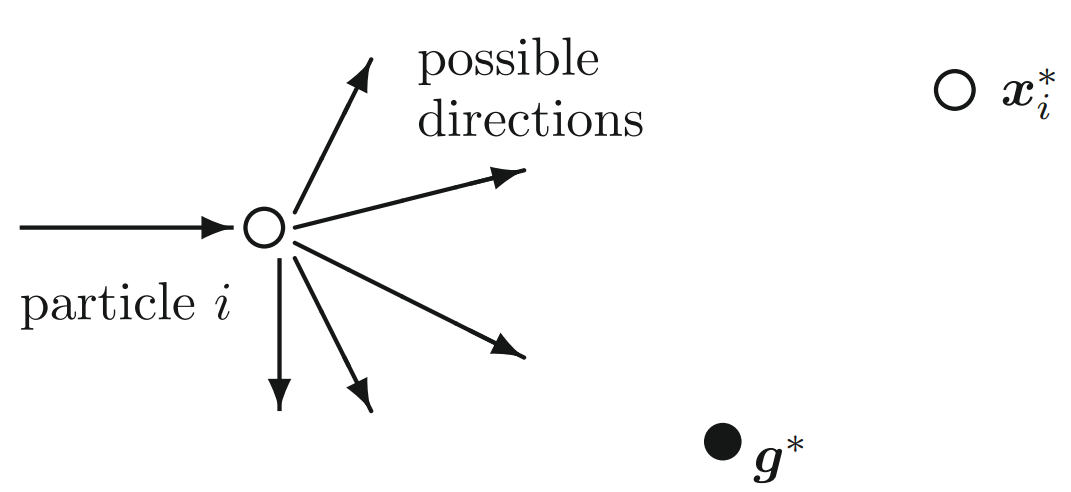

*Schematic representation of the motion of a particle in PSO, moving toward the global best* $\mathbf{g}^*$ *and the current personal best* $\mathbf{x}^*_i$ *for each particle* $i$.


## 4. Classical Pseudocode

1. Initialize a population of $n$ particles (positions $\mathbf{x}_i$ and velocities $\mathbf{v}_i$)  
2. Evaluate $f(\mathbf{x}_i)$ and set $\mathbf{x}^*_i = \mathbf{x}_i$  
3. Set $\mathbf{g}^* = \arg\min f(\mathbf{x}^*_i)$  
4. While stopping criterion is not satisfied:  
    - For each particle $i$:  
        - Update $\mathbf{v}_i$ using Eq. (1) or (3)  
        - Update $\mathbf{x}_i = \mathbf{x}_i + \mathbf{v}_i$  
        - Evaluate $f(\mathbf{x}_i)$  
        - If $f(\mathbf{x}_i) < f(\mathbf{x}^*_i)$:  
            - $\mathbf{x}^*_i = \mathbf{x}_i$  
    - Update $\mathbf{g}^* \text{ with the best } \mathbf{x}^*_i$


5. Return $\mathbf{g}^*$


.

.

.

## Theoretical Execution Example

### 1 — Problem Setup

* **Objective function (maximization)**  
  $$
  f(x_1, x_2) = x_1^2 + x_2^2 - x_1x_2 + 2x_1 + 4x_2 + 3
  $$

* **Search bounds** $-5 \leq x_1, x_2 \leq 5$  
* **Swarm size** $n = 5$ particles  
* **Dimension** $d = 2$  
* **Accelerations** $\alpha = \beta = 1{,}5$  
* **Inertia factor** $\theta$ (assumed embedded in the initial velocity)  
* **Planned iterations** 20  

---

### 2 — Iteration 0: Initialization

| Particle | **x = (x₁,x₂)**        | **v = (v₁,v₂)**     | f(x)      |
|----------|------------------------|---------------------|-----------|
| 1        | (−0.9355 ;  3.1836)     | (0.0443 ; 0.0443)    | 27.8516   |
| 2        | (−1.7027 ; −0.3482)     | (0.0443 ; 0.0443)    | 0.6293    |
| 3        | ( 4.5879 ; −3.5555)     | (0.0443 ; 0.0443)    | **47.9569** |
| 4        | (−4.9214 ;  1.3059)     | (0.0443 ; 0.0443)    | 30.7330   |
| 5        | ( 3.5489 ;  1.0510)     | (0.0443 ; 0.0443)    | 24.2714   |

* Each particle’s **pbest** = its initial position.  
* **gbest** = particle 3, since it has the highest fitness (47.9569).

---

### 3 — Iteration 1

#### 3.1 Update velocities

For each component, apply:  

$$
\mathbf{v}_{i}^{\,t+1} = \theta\,\mathbf{v}_{i}^{\,t}
+ \alpha\,\varepsilon_1\,(\mathbf{g}_{\text{best}} - \mathbf{x}_{i}^{\,t})
+ \beta\,\varepsilon_2\,(\mathbf{p}_{\text{best},i} - \mathbf{x}_{i}^{\,t})
$$

Since this is the first iteration, **pbest = x**, so the last term is zero.

> **Example – component $x_1$ of Particle 1**  
> ($\theta = 0{,}0443$, $\alpha = 1{,}5$, random values independently drawn for $\varepsilon_1$ and $\varepsilon_2$)
>
> ```
> v11 = 0.0443                       # θ·v
>      + 1.5 * rand * (4.5879 − (−0.9355))
>      + 0
> ```
> With `rand ≈ 0.354`, we get:  
> ```
> v11 ≈ 0.0443 + 1.5 * 0.354 * 5.5234 ≈ 2.9719
> ```

The same procedure is applied to $v_{12}$, $v_{2*}$, …, limiting $|\mathbf{v}|$ to $v_{\max}$ (if defined) to prevent excessive jumps.

#### 3.2 Update positions

$$
\mathbf{x}_{i}^{\,t+1} = \mathbf{x}_{i}^{\,t} + \mathbf{v}_{i}^{\,t+1}
$$

For Particle 1:

$$
x_{11}^{\text{new}} = -0.9355 + 2.9719 = 3.9074
$$

If the value exceeds the search limits, **clamping** or **reflection** is applied; otherwise, the new position is accepted.

#### 3.3 — Evaluate the objective function

* Compute $f(\mathbf{x})$ at the updated positions.  
* If $f(\mathbf{x}_i^{\text{new}}) > f(\mathbf{x}^*_i)$, update **pbestᵢ**:  
  $\mathbf{x}^*_i = \mathbf{x}_i^{\text{new}}$  
* Among the new $\mathbf{x}^*_i$, choose the new **gbest** (i.e., the particle with the highest fitness).

---

### 4 — Iteration 2

Repeat the same cycle:

1. Compute new **velocities** (now $\mathbf{x}^*_i$ may differ from $\mathbf{x}_i$),  
2. Update **positions**,  
3. Recalculate **fitness**, update $\mathbf{x}^*_i$ and $\mathbf{g}^*$.

---

### 5 — Iteration 3 onward

From the third iteration on, the algorithm keeps the loop below until the stopping criterion is met (20 iterations or improvement below $\varepsilon$):

1. Update **velocity** and **position**  
2. Compute **fitness**  
3. Update **gbest**  
4. Update **pbest**

---


.

.

.

## Practical Execution Example


## 1 — Functions Used

### 📌 Rosenbrock

**Definition:**

$$
f(x_1, x_2) = 100\,(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

**Global minimum:**  
$(1, 1)$ with $f_{\min} = 0$

**Characteristics:**  
Smooth landscape, but with a **narrow and curved valley**. Requires good exploration to find the valley and precise movement to follow it.

---

### 📌 Ackley

**Definition:**

$$
f(x) = -20\,e^{-0.2\sqrt{\frac{x_1^2 + x_2^2}{2}}}
- e^{\frac{\cos(2\pi x_1) + \cos(2\pi x_2)}{2}}
+ 20 + e
$$

**Global minimum:**  
$(0, 0)$ with $f_{\min} = 0$

**Characteristics:**  
Highly **multimodal**: many concentric local minima. Ideal for testing whether the algorithm avoids getting trapped and converges to the global minimum.

---

The GIFs illustrate, frame by frame, the trajectory of the particles and the convergence curve of PSO over these two surfaces.


<img src="https://raw.githubusercontent.com/KeishiIshihara/pso_with_python/2072c5aac9910d31043c718d6521f92d7d8a0111/gif/PSO_Rosenbrock_population_30.gif" width="1800">


<img src="https://raw.githubusercontent.com/KeishiIshihara/pso_with_python/2072c5aac9910d31043c718d6521f92d7d8a0111/gif/PSO_Ackley_population_30.gif" width="1800">


# Implementation


In [8]:
import numpy as np

# -------- Rosenbrock Function --------
def rosenbrock(x):
    return 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# ---------- PSO Algorithm ----------
def pso(func, bounds, n_particles=30, n_iter=100,
        w=0.7, c1=1.5, c2=1.5, vmax=0.2):
    dim = len(bounds)

    # initial positions and velocities
    pos = np.random.uniform(bounds[:, 0], bounds[:, 1],
                            size=(n_particles, dim))
    vel = np.random.uniform(-abs(bounds[:, 1] - bounds[:, 0]),
                            abs(bounds[:, 1] - bounds[:, 0]),
                            size=(n_particles, dim)) * 0.1

    pbest = pos.copy()
    pbest_val = np.apply_along_axis(func, 1, pbest)
    gbest_idx = np.argmin(pbest_val)
    gbest = pbest[gbest_idx].copy()
    gbest_val = pbest_val[gbest_idx]

    hist = [gbest_val]

    for _ in range(n_iter):
        r1, r2 = np.random.rand(n_particles, dim), np.random.rand(n_particles, dim)
        # velocity update
        vel = (w * vel
               + c1 * r1 * (pbest - pos)
               + c2 * r2 * (gbest - pos))
        vel = np.clip(vel, -vmax, vmax)

        # position update
        pos += vel
        pos = np.clip(pos, bounds[:, 0], bounds[:, 1])

        # evaluation
        vals = np.apply_along_axis(func, 1, pos)
        better = vals < pbest_val
        pbest[better] = pos[better]
        pbest_val[better] = vals[better]

        # new gbest
        gbest_idx = np.argmin(pbest_val)
        if pbest_val[gbest_idx] < gbest_val:
            gbest_val = pbest_val[gbest_idx]
            gbest = pbest[gbest_idx].copy()

        hist.append(gbest_val)

    return gbest, gbest_val, np.array(hist)

# -------- Execution on Rosenbrock --------
bounds_rb = np.array([[-5, 5], [-5, 5]])

gbest, gbest_val, hist = pso(rosenbrock, bounds_rb,
                             n_particles=30, n_iter=100)

print("Rosenbrock  —  best x:", gbest, "|  f(x) =", gbest_val)

Rosenbrock  —  best x: [0.99755815 0.99527461] |  f(x) = 8.283566423277775e-06


In [9]:
import numpy as np

# -------- Ackley Function --------
def ackley(x):
    d = len(x)
    term1 = -20.0 * np.exp(-0.2 * np.sqrt((x[0]**2 + x[1]**2) / d))
    term2 = -np.exp((np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1])) / d)
    return term1 + term2 + 20 + np.e

# Reuse the same pso() function defined earlier

# -------- Execution on Ackley --------
bounds_ak = np.array([[-32, 32], [-32, 32]])

gbest, gbest_val, hist = pso(ackley, bounds_ak,
                             n_particles=30, n_iter=100)

print("Ackley  —  best x:", gbest, "|  f(x) =", gbest_val)

Ackley  —  best x: [-1.32693312e-04 -9.51686526e-01] |  f(x) = 2.5799335058905375


## Using the pyMetaheuristic Library


In [5]:
!pip install pyMetaheuristic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.4 MB/s eta 0:00:00


In [6]:
import numpy as np
from pyMetaheuristic.algorithm import particle_swarm_optimization

# ----- Objective Function -----
def rosenbrock(variables_values = [0, 0]):
    x1, x2 = variables_values
    return 100*(x2 - x1**2)**2 + (1 - x1)**2

# ----- PSO Parameters -----
parameters_rb = {
    'swarm_size'  : 30,
    'min_values'  : (-5, -5),
    'max_values'  : ( 5,  5),
    'iterations'  : 100,
    'decay'       : 0,
    'w'           : 0.7,
    'c1'          : 1.5,
    'c2'          : 1.5,
    'verbose'     : True,
    'start_init'  : None,
    'target_value': None
}

# ----- Execution -----
pso_rb = particle_swarm_optimization(
            target_function = rosenbrock,
            **parameters_rb
         )

vars_rb = pso_rb[:-1]   # coordinates
best_rb = pso_rb[-1]    # minimum value
print('Rosenbrock → x =', np.around(vars_rb, 6),
      '| f(x) =', best_rb)

Iteration =  0  f(x) =  40.29075718793515
Iteration =  1  f(x) =  10.429779485635471
Iteration =  2  f(x) =  6.176491916024749
Iteration =  3  f(x) =  1.8951417577094085
Iteration =  4  f(x) =  1.8951417577094085
Iteration =  5  f(x) =  1.46815201433121
Iteration =  6  f(x) =  1.46815201433121
Iteration =  7  f(x) =  1.46815201433121
Iteration =  8  f(x) =  0.16068728604241678
Iteration =  9  f(x) =  0.08089512197252595
Iteration =  10  f(x) =  0.05329190551223964
Iteration =  11  f(x) =  0.05329190551223964
Iteration =  12  f(x) =  0.05329190551223964
Iteration =  13  f(x) =  0.014657346769444341
Iteration =  14  f(x) =  0.014657346769444341
Iteration =  15  f(x) =  0.014657346769444341
Iteration =  16  f(x) =  0.014657346769444341
Iteration =  17  f(x) =  0.014657346769444341
Iteration =  18  f(x) =  0.014657346769444341
Iteration =  19  f(x) =  0.014657346769444341
Iteration =  20  f(x) =  0.014657346769444341
Iteration =  21  f(x) =  0.014657346769444341
Iteration =  22  f(x) =  0.

In [7]:
import numpy as np
from pyMetaheuristic.algorithm import particle_swarm_optimization

# ----- Objective Function -----
def ackley(variables_values = [0, 0]):
    x1, x2 = variables_values
    term1  = -20.0 * np.exp(-0.2 * np.sqrt((x1**2 + x2**2) / 2))
    term2  = -np.exp((np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)) / 2)
    return term1 + term2 + 20 + np.e

# ----- PSO Parameters -----
parameters_ak = {
    'swarm_size'  : 30,
    'min_values'  : (-32, -32),
    'max_values'  : ( 32,  32),
    'iterations'  : 100,
    'decay'       : 0,
    'w'           : 0.7,
    'c1'          : 1.5,
    'c2'          : 1.5,
    'verbose'     : True,
    'start_init'  : None,
    'target_value': None
}

# ----- Execution -----
pso_ak = particle_swarm_optimization(
            target_function = ackley,
            **parameters_ak
         )

vars_ak = pso_ak[:-1]
best_ak = pso_ak[-1]
print('Ackley → x =', np.around(vars_ak, 6),
      '| f(x) =', best_ak)

Iteration =  0  f(x) =  8.020115437766737
Iteration =  1  f(x) =  8.020115437766737
Iteration =  2  f(x) =  6.024532782826803
Iteration =  3  f(x) =  6.024532782826803
Iteration =  4  f(x) =  6.024532782826803
Iteration =  5  f(x) =  2.658685606583504
Iteration =  6  f(x) =  2.658685606583504
Iteration =  7  f(x) =  2.658685606583504
Iteration =  8  f(x) =  2.658685606583504
Iteration =  9  f(x) =  2.658685606583504
Iteration =  10  f(x) =  2.658685606583504
Iteration =  11  f(x) =  2.658685606583504
Iteration =  12  f(x) =  2.658685606583504
Iteration =  13  f(x) =  2.658685606583504
Iteration =  14  f(x) =  2.658685606583504
Iteration =  15  f(x) =  1.646215067929735
Iteration =  16  f(x) =  1.0011049128393137
Iteration =  17  f(x) =  0.3257104725355231
Iteration =  18  f(x) =  0.3257104725355231
Iteration =  19  f(x) =  0.060254289258292903
Iteration =  20  f(x) =  0.060254289258292903
Iteration =  21  f(x) =  0.060254289258292903
Iteration =  22  f(x) =  0.060254289258292903
Iterat